In [1]:
import pandas as pd
import os
import geopandas as gpd

In [2]:
os.chdir('../mapnyc/urban_agriculture')

In [3]:
farm = pd.read_csv('farm_garden_pluto.csv')
farm = farm[['name', 'type', 'lat', 'lon', 'Shape_Area']]
farm.head()

,name,type,lat,lon,Shape_Area
0,Battery Farm,Non-commercial Farm,40.704513,-74.014278,NaN
1,Bowery Farming,Commercial Farm,40.745785,-73.993244,1.561102e+04
2,BrightFarms,Commercial Farm,40.754407,-73.970885,1.729214e+03
3,Brooklyn Grange Rooftop Farms,Commercial Farm,40.751924,-73.925419,5.188052e+04
4,Brooklyn Grange Rooftop Farms,Commercial Farm,40.698459,-73.977756,9.997440e+06


In [4]:
cg = pd.read_csv('urban_ag.csv') # community gardens
cg.head()

,name,address,type,grow,source,lat,lon,lotarea,borocode,block,lot
0,Fishbridge Park Garden,"Pearl Street, New York, NY 10038, USA",Community Garden,Outdoor,GreenThumb,40.709068,-74.001378,4034.0,1.0,106.0,22.0
1,Lower East Side People Care,"25 Rutgers Street, New York, NY 10002, USA",Community Garden,Outdoor,GreenThumb,40.713006,-73.989824,2135.0,1.0,271.0,63.0
2,Clinton Community Garden (LES),"Stanton Street, New York, NY 10002, USA",Community Garden,Outdoor,GreenThumb,40.720010,-73.984459,2533.0,1.0,344.0,148.0
3,Siempre Verde Garden,"Stanton Street, New York, NY 10002, USA",Community Garden,Outdoor,GreenThumb,40.719930,-73.984019,1197.0,1.0,344.0,153.0
4,Siempre Verde Garden,"Attorney Street, New York, NY 10002, USA",Community Garden,Outdoor,GreenThumb,40.719744,-73.984008,1405.0,1.0,344.0,158.0


In [5]:
cg = gpd.GeoDataFrame(cg, geometry=gpd.points_from_xy(cg.lon, cg.lat), crs=4326)
fr = gpd.GeoDataFrame(farm, geometry=gpd.points_from_xy(farm.lon, farm.lat), crs=4326)

In [6]:
# uf = pd.read_csv('urban_farms.csv')
# uf.head()

In [7]:
import geopandas as gpd
nyc = gpd.read_file('https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Community_Districts/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson')
nyc.head()

,OBJECTID,BoroCD,Shape__Area,Shape__Length,geometry
0,1,206,4.266431e+07,35875.711733,"POLYGON ((-73.87185 40.84377, -73.87192 40.843..."
1,2,404,6.573966e+07,37018.373839,"POLYGON ((-73.84751 40.73902, -73.84801 40.738..."
2,3,304,5.666255e+07,37007.766906,"POLYGON ((-73.89647 40.68234, -73.89653 40.682..."
3,4,205,3.831698e+07,29443.048129,"POLYGON ((-73.89138 40.86171, -73.89142 40.861..."
4,5,207,5.331180e+07,44812.008517,"POLYGON ((-73.87519 40.87158, -73.87619 40.870..."


In [8]:
nyc['BoroCD']=nyc['BoroCD'].astype(str)
nyc['borough_no'] = nyc['BoroCD'].str[0:1]
nyc['cd']=nyc['BoroCD'].str[1:]

nyc['borough_code'] = nyc['borough_no'].replace({'1': 'MN',
                          '2': 'BX',
                          '3':'BK',
                          '4':'QN',
                          '5': 'SI'})

nyc['cd'] = nyc['borough_code'] + nyc['cd']

nyc.head()

,OBJECTID,BoroCD,Shape__Area,Shape__Length,geometry,borough_no,cd,borough_code
0,1,206,4.266431e+07,35875.711733,"POLYGON ((-73.87185 40.84377, -73.87192 40.843...",2,BX06,BX
1,2,404,6.573966e+07,37018.373839,"POLYGON ((-73.84751 40.73902, -73.84801 40.738...",4,QN04,QN
2,3,304,5.666255e+07,37007.766906,"POLYGON ((-73.89647 40.68234, -73.89653 40.682...",3,BK04,BK
3,4,205,3.831698e+07,29443.048129,"POLYGON ((-73.89138 40.86171, -73.89142 40.861...",2,BX05,BX
4,5,207,5.331180e+07,44812.008517,"POLYGON ((-73.87519 40.87158, -73.87619 40.870...",2,BX07,BX


In [9]:
joined_gdf = gpd.sjoin(cg, nyc, op='within')
cd_cg = pd.DataFrame(joined_gdf.groupby('cd').size(), columns=['cg'])

In [10]:
cg.groupby('type').size()

type
Commercial Farm                 22
Community Garden              1020
NYCHA Garden                   595
Non-commercial Farm             29
Potential Community Garden      89
School Garden                  676
dtype: int64

In [11]:
# a very non-pythonic way of creating a new dataframe for each farm type
for type in cg['type'].unique():
    globals()['df_'+str(type).replace(" ", "").replace('-', '')] = cg[cg['type']==type] 

In [12]:
# creating a list of string names of the new dataframes 
list_dfnames = []

for var in dir():
    if 'df_' in var:
        list_dfnames.append(var)
        
list_dfnames

['df_CommercialFarm',
 'df_CommunityGarden',
 'df_NYCHAGarden',
 'df_NoncommercialFarm',
 'df_PotentialCommunityGarden',
 'df_SchoolGarden']

In [13]:
# creating a list of dataframes
list_df = [df_CommercialFarm,
 df_CommunityGarden,
 df_NYCHAGarden,
 df_NoncommercialFarm,
 df_PotentialCommunityGarden,
 df_SchoolGarden]

In [14]:
# defining a function to perform poly-in-points and merge outputs together
def merge_all(df_list):

    cd = pd.DataFrame() # create empty df to append to 
    
    for df in df_list:
        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs=4326) # create geodataframe of points
        joined_gdf = gpd.sjoin(gdf, nyc, op='within') # perform spatial join with NYC CD shapefile
        
        # desired output is a gdf with each point labelled with the CD it is located within
        
        grouped_by_cd = pd.DataFrame(joined_gdf.groupby('cd').size())
        cd = pd.concat([cd, grouped_by_cd], axis=1)
        
    return cd

by_type = merge_all(list_df)

In [18]:
col_names = [str(i) for i in list_dfnames]
col_names = [i.replace('df_', '') for i in list_dfnames] 

In [19]:
col_names

['CommercialFarm',
 'CommunityGarden',
 'NYCHAGarden',
 'NoncommercialFarm',
 'PotentialCommunityGarden',
 'SchoolGarden']

In [22]:
by_type.columns = col_names
by_type.fillna(0, inplace=True)
by_type.head()

,CommercialFarm,CommunityGarden,NYCHAGarden,NoncommercialFarm,PotentialCommunityGarden,SchoolGarden
BK01,4.0,33.0,29.0,0.0,1.0,15.0
BK02,2.0,17.0,21.0,1.0,4.0,17.0
BK04,1.0,36.0,14.0,0.0,2.0,15.0
BK06,1.0,33.0,19.0,1.0,0.0,19.0
BK07,2.0,5.0,0.0,0.0,1.0,15.0


In [24]:
df = by_type
norm_df=(df-df.min())/(df.max()-df.min())
norm_df.head()

,CommercialFarm,CommunityGarden,NYCHAGarden,NoncommercialFarm,PotentialCommunityGarden,SchoolGarden
BK01,1.00,0.230769,0.414286,0.00,0.05,0.555556
BK02,0.50,0.118881,0.300000,0.25,0.20,0.629630
BK04,0.25,0.251748,0.200000,0.00,0.10,0.555556
BK06,0.25,0.230769,0.271429,0.25,0.00,0.703704
BK07,0.50,0.034965,0.000000,0.00,0.05,0.555556


In [49]:
summed = pd.DataFrame(norm_df.sum(axis=1), columns=['sum'])

<AxesSubplot:>

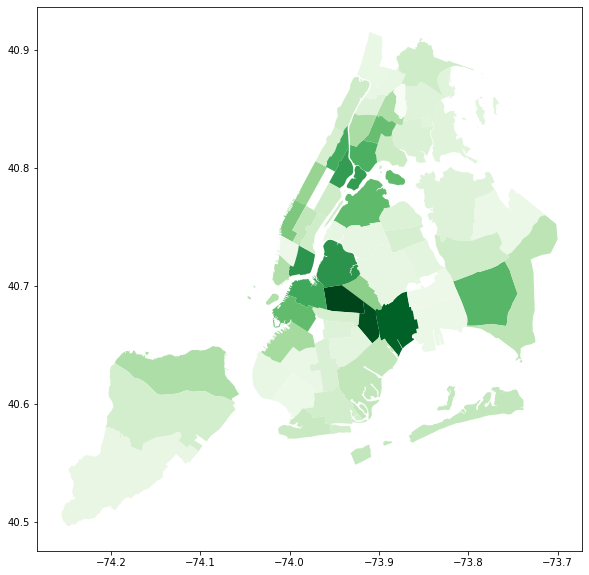

In [51]:
summed_gdf = nyc.merge(summed, left_on='cd', right_on=summed.index)
summed_gdf.plot('sum', cmap='Greens', figsize=(20,10))

In [ ]:
# future work: 
# • to normalize by population
# • to do ranking instead with additive aggregation - would that work? 
# • to discuss - how to weight the categories. are 
#  CommercialFarm	CommunityGarden	NYCHAGarden	NoncommercialFarm	PotentialCommunityGarden	SchoolGarden
# equally as important 

In [ ]:
# def merge_all(df1, df2):
#     from varname import nameof

#     cd = pd.DataFrame()
#     df_list = [df1, df2]
    
#     for df in df_list:
#         gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs=4326)
#         joined_gdf = gpd.sjoin(gdf, nyc, op='within')
        
#         column_name = nameof(df)
#         grouped_by_cd = pd.DataFrame(joined_gdf.groupby('cd').size())
#         cd = pd.concat([cd, grouped_by_cd], axis=1)
        
#     return cd

# merge_all(farm, cg)

,0,0
BK01,29.0,82
BK02,31.0,62
BK03,50.0,207
BK04,26.0,68
BK05,51.0,189
BK06,29.0,73
BK07,22.0,23
BK08,15.0,33
BK09,14.0,12
BK10,9.0,9
